## SELECTED DATASET
The selected dataset is named <font color='pink'>"Amazon_Sale_Report"</font> which is an E-commerce dataset for analysing online business performance. A related dataset is named <font color='pink'>"India_Socio_Economic_Status_by_State"</font> this file has been renamed from its original version of "elementary_2015_16.csv" for a better understanding during the project. This file is based on the India 2011 census.

-The two datasets are available to the public and they are also published on kaggle. 
Here are the links:
  -https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data 
  -https://www.kaggle.com/datasets/webaccess/all-census-data?select=elementary_2015_16.csv
  
-The main datset is the <font color='pink'>"Amazon dataset"</font>, it will be enriched by the Indian socio economic dataset using the <font color='pink'>"State"</font> column which is common in both. 
- The <font color='pink'>"Amazon dataset"</font> dataset has over 128,977 rows of data and 24 columns but we have taken the first 35000 rows

## PROBLEM STATEMENT
Business driven by E-commerce is highly dependent on access to devices with internet and literacy in any given country or space. The socio economic assessment of a country will therefore form a good basis for comparison to determine the relationship between literacy and the purchasing power of people, particularly on E-commerce platforms

## OBJECTIVES
- To explore probable business correlations based on the sales data and the Socio economic data.
- To establish any limitation to the interpretation of the results and their impact on the data 
- To establish dominant trends based on categories such as Gender, State, Months etc. that may be used to leverage profit.
- To establish the Correlation and Pattern Discovery for our two Data-sets.
- To provide Comprehensive, Communication reporting and actionable Recommendations.

IMPORTING RELEVANT LIBRARIES FROM PYTHON

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px


## THE AMAZON DATASET

In [2]:
#Loading the raw dataset
#df_Amazon_raw = pd.read_csv("Amazon Sale Report_raw.csv",index_col=0)
#df_Amazon_raw = df_Amazon_raw [0:35000]

In [3]:
#Reducing the size of the file for Github upload
#df_Amazon_raw.to_csv('Amazon Sale Report.csv')

In [4]:
#Loading the dataset
df_Amazon = pd.read_csv("Amazon Sale Report.csv",index_col=0)

SUB-SETTING THE DATABASE

In [5]:
#Choose the columns we will work with from this dataset
df_Amazon = df_Amazon[['Order ID', 'Date', 'Status', 'Qty' , 'Amount','ship-city',
       'ship-state']]

In [6]:
#Loading the columns from the Amazon dataset into a list using a for loop
df_Amazon_Col_List = []
for col in df_Amazon.columns:
    df_Amazon_Col_List.append(col)

In [7]:
#Checking for Null values
df_Amazon.isna().sum()

Order ID         0
Date             0
Status           0
Qty              0
Amount        2130
ship-city       11
ship-state      11
dtype: int64

In [8]:
#Checking the shape of the dataset
df_Amazon.shape

(35000, 7)

DATA CLEANING OF THE AMAZON DATABASE

In [9]:
# Renaming states that have signs and operands
df_Amazon[df_Amazon['ship-state']=='JAMMU & KASHMIR']='JAMMU AND KASHMIR'
df_Amazon[df_Amazon['ship-state']== 'Punjab/Mohali/Zirakpur']='PUNJAB AND MOHALI AND ZIRAKPUR'
df_Amazon[df_Amazon['ship-state']== 'ANDAMAN & NICOBAR ']='ANDAMAN AND NICOBAR'

In [10]:
#Checking unique values in the state column to confirm the above changes
df_Amazon['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU AND KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN AND NICOBAR', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'PUNJAB AND MOHALI AND ZIRAKPUR',
       'Puducherry', 'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP'],
      dtype=object)

In [11]:
#Checking the Null values in the State column
df_Amazon['ship-state'].isna().sum()

11

In [12]:
#Putting the state names in a list using a for loop
df_Amazon_state_list = []
for state in df_Amazon['ship-state'].unique():
    df_Amazon_state_list.append(state)
print(len(df_Amazon_state_list))

55


In [13]:
#Renaming the State column in the Amazon dataset
df_Amazon.rename(columns={'ship-state':'STATE_NAME'},inplace=True)

In [14]:
df_Amazon.shape

(35000, 7)

In [15]:
#Changing the datatype to string and dropping the non numeric rows in the Quantity column
df_Amazon['Qty'] = df_Amazon['Qty'].astype('str')
df_Amazon = df_Amazon[df_Amazon[['Qty']].apply(lambda x: x[0].isdigit(),axis =1)]

In [16]:
#Changing values that do not match the data type in those specific columns
df_Amazon[df_Amazon['Qty']=='JAMMU AND KASHMIR'] = 1
df_Amazon[df_Amazon['Qty']=='ANDAMAN AND NICOBAR'] = 1
df_Amazon[df_Amazon['Qty']=='PUNJAB AND MOHALI AND ZIRAKPUR'] = 1
df_Amazon[df_Amazon['STATE_NAME']==1] = 'MAHARASHTRA'
#Dropped_All_nan values
df_Amazon=df_Amazon.dropna(subset=df_Amazon.columns.values)

In [17]:
df_Amazon['Status'].value_counts()

Shipped                          19542
Shipped - Delivered to Buyer      9370
Cancelled                         2994
Shipped - Returned to Seller       699
Shipped - Rejected by Buyer          4
Shipped - Lost in Transit            2
Shipped - Returning to Seller        2
Shipped - Out for Delivery           1
Shipped - Picked Up                  1
Name: Status, dtype: int64

## THE INDIAN DATASET

In [18]:
#Load the Indian socio economic dataset
df_India = pd.read_csv("India_Socio_Economic_Status_by_State.csv",index_col=0)

In [19]:
#Put the columns in the Indian dataset into a list using a for loop
df_India_Col_List = []
for col in df_India.columns:
    df_India_Col_List.append(col)

SUB-SETTING THE INDIAN DATASET

In [20]:
#df_India_Col_List
df_India_Subset = df_India[[ 'STATE NAME',
 'TOTAL POULATION',
 'PERCENTAGE URBAN POPULATION','SEX RATIO','OVERALL LITERACY',
 'FEMALE LITERACY',
 'MALE LITERACY']]
#df_India_Subset.head()

In [21]:
#Put the states in the Indian dataset into a list using a for loop
df_India_state_list = []
for state in df_India_Subset['STATE NAME'].unique():
    df_India_state_list.append(state)
print(len(df_India_state_list))
#df_India_state_list

36


In [22]:
#Combine states in the Indian and Amazon dataset
df_Amazon_state_list_string = map(str,df_Amazon_state_list)
df_Amazon_state_list_string =sorted(df_Amazon_state_list_string)
print (len(df_Amazon_state_list))
#df_Amazon_state_list
df_India_state_list =sorted(df_India_state_list)
print (len(df_India_state_list))
#df_India_state_list
In_both = df_Amazon_state_list_string+df_India_state_list
print (len(In_both))
In_both = sorted (In_both)
print(len(set(In_both)))
#In_both

55
36
91
60


CREATE DICTIONARY WITH STATE COUNT IN BOTH DATASETS

In [23]:
#Make a dictionary with the number of times a state appears, if it appears twice it is in the Amazon 
# and the Indian datset
Count = []
for index in df_Amazon_state_list_string:
    Count.append(In_both.count(index))
print (len (Count))
#Count
State_dict = dict(zip(df_Amazon_state_list_string,Count))
#State_dict
Final_List = []
for key,value in State_dict.items():
    if value >=2:
        Final_List.append(key)
print (len(Final_List))
#Final_List

55
31


In [24]:
#A final list with state names that appear in both datasets
Final_List = []
for key,value in State_dict.items():
    if value >=2:
        Final_List.append(key)
print (len(Final_List))
#Final_List

31


DATA CLEANING FOR THE INDIAN DATASET

In [25]:
df_India_Subset_Final = df_India_Subset[df_India_Subset['STATE NAME'].isin(Final_List)]
df_India_Subset_Final.rename(columns={'TOTAL POULATION':'TOTAL_POPULATION'},inplace=True)
df_India_Subset_Final.rename(columns={'STATE NAME':'STATE_NAME'},inplace=True)
df_India_Subset_Final.rename(columns={'PERCENTAGE URBAN POPULATION':'PERCENTAGE_URBAN_POPULATION'},inplace=True)
df_India_Subset_Final.rename(columns={'OVERALL LITERACY':'OVERALL_LITERACY'},inplace=True)
df_India_Subset_Final.rename(columns={'MALE LITERACY':'MALE_LITERACY'},inplace=True)
df_India_Subset_Final.rename(columns={'FEMALE LITERACY':'FEMALE_LITERACY'},inplace=True)

c:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


EXPLORATORY DATA ANALYSIS OF THE INDIAN DATASET

In [26]:
#Measures of central tendency for Indian dataset
stat_list = ['MALE_LITERACY','TOTAL_POPULATION','OVERALL_LITERACY','FEMALE_LITERACY','PERCENTAGE_URBAN_POPULATION',
             'SEX RATIO']
for col in stat_list:
    print(col,'Stats')
    print('Mean -',df_India_Subset_Final[col].mean())
    print('Median -',df_India_Subset_Final[col].median())
    print('Standard Deviation -',df_India_Subset_Final[col].std())
    print()
    print()

MALE_LITERACY Stats
Mean - 81.26980066445182
Median - 82.485
Standard Deviation - 8.683014035397006


TOTAL_POPULATION Stats
Mean - 1908674.7491638795
Median - 1569366.0
Standard Deviation - 1542192.1664306878


OVERALL_LITERACY Stats
Mean - 73.01397993311036
Median - 73.1
Standard Deviation - 10.11852861435543


FEMALE_LITERACY Stats
Mean - 64.2053078202995
Median - 63.42
Standard Deviation - 12.501321741323544


PERCENTAGE_URBAN_POPULATION Stats
Mean - 23.936134453781513
Median - 19.0
Standard Deviation - 18.213193385983278


SEX RATIO Stats
Mean - 943.3026755852843
Median - 947.0
Standard Deviation - 59.40515032913032




## JOINING THE DATASETS

In [27]:
#Concatenate the dataset based on the state column
to_concat = [df_Amazon,df_India_Subset_Final]
df_Main = pd.concat(to_concat,join='outer')
df_Main.shape

(33252, 13)

DATA CLEANING OF THE MERGED DATASET

In [28]:
# Renaming columns to appropriate labels and changing data types 
df_Main.rename(columns={'TOTAL POULATION':'TOTAL_POPULATION'},inplace=True)
df_Main.columns = df_Main.columns.str.upper()
df_Main = df_Main.dropna(subset=['ORDER ID'])
df_Main['STATE_NAME'] = df_Main['STATE_NAME'].str.upper()
df_Main['AMOUNT'] = df_Main['AMOUNT'].astype('float64')

EXPLORATORY DATA ANALYSIS OF THE MERGED DATASET

In [29]:
#Check on outliers especially on the amount column
fig = px.box(df_Main['AMOUNT'], points="outliers")
fig.show();

In [30]:
#Dropping outliers based on the Amount column
df_Main =df_Main.loc[df_Main['AMOUNT']<=1369]
df_Main = df_Main.set_index('STATE_NAME')

FILLING NULL VALUES IN THE MERGED DATASET

In [31]:
#Filling Null values in the dataframe based on statistical measures of central tendency
population = df_India_Subset_Final.groupby('STATE_NAME').agg({'TOTAL_POPULATION':'median',
                                                              'PERCENTAGE_URBAN_POPULATION':'median',
                                                              'SEX RATIO':'median',
                                                              'OVERALL_LITERACY':'median',
                                                              'FEMALE_LITERACY':'median',
                                                              'MALE_LITERACY':'median'})
#Create a list of the columns with missing values
fill_na_List = ['TOTAL_POPULATION','PERCENTAGE_URBAN_POPULATION',
                'SEX RATIO','OVERALL_LITERACY','FEMALE_LITERACY','MALE_LITERACY'] 
#Run a for loop to fill the null values
for col in fill_na_List:
    df_Main[col] = df_Main[col].fillna(population[col])

CREATING NEW COLUMNS IN THE MERGED DATASET AND CHANGING SOME DATA TYPES

In [32]:
month_dict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
              9:'September',10:'October',11:'November',12:'December'}
df_Main['DATE'] = pd.to_datetime(df_Main['DATE'])
df_Main['DAY'] = df_Main['DATE'].dt.day_name()
df_Main['MONTH'] = pd.DatetimeIndex(df_Main['DATE']).month
df_Main['MONTH'] = df_Main['MONTH'].map(month_dict)

CALCULATING NEW COLUMNS BASED ON PRE-EXISTING COLUMNS

In [33]:
new_col_list = ['URBAN_POPULATION','LITERATE_POPULATION','LITERATE_POPULATION_MALE','LITERATE_POPULATION_FEMALE']
calc_from = ['PERCENTAGE_URBAN_POPULATION','OVERALL_LITERACY','MALE_LITERACY','FEMALE_LITERACY']
#for col in new_col_list:
    #df_Main[col] = df_Main.apply(lambda row: row.(lambda y:y for y in calc_from)/100
                                            #*row.x,axis = 1)
df_Main['URBAN_POPULATION'] = df_Main.apply(lambda row: row.PERCENTAGE_URBAN_POPULATION/100
                                            *row.TOTAL_POPULATION,axis = 1)
df_Main['LITERATE_POPULATION'] = df_Main.apply(lambda row: row.OVERALL_LITERACY/100
                                            *row.TOTAL_POPULATION,axis = 1)
df_Main['LITERATE_POPULATION_MALE'] = df_Main.apply(lambda row: row.MALE_LITERACY/100
                                            *row.TOTAL_POPULATION,axis = 1)
df_Main['LITERATE_POPULATION_FEMALE'] = df_Main.apply(lambda row: row.FEMALE_LITERACY/100
                                            *row.TOTAL_POPULATION,axis = 1)
df_Main=df_Main.dropna(subset=df_Main.columns.values)

In [34]:
#Check for any null values
#df_Main.isna().sum()
#df_Main

EXPLORATORY DATA ANALYSIS USING PIVOT TABLES

In [35]:
#Using the pivot functions to combine columns based on specific funtions
df_pivot_Amount = df_Main.pivot_table(index=['STATE_NAME'],columns=['STATUS'],values=['AMOUNT'],aggfunc={'sum'})
#df_pivot_Amount

EXPLORATORY DATA ANALYSIS USING GROUP BY FUNCTIONS

In [36]:
#Using the groupby functions to aggregate columns based on specific funtions
df_plot = df_Main.groupby(['STATE_NAME']).agg({'AMOUNT':'sum',
                                          'TOTAL_POPULATION':'mean',
                                        'URBAN_POPULATION':'mean',
                                        'SEX RATIO':'mean',
                                        'LITERATE_POPULATION':'mean',
                                        'LITERATE_POPULATION_FEMALE':'mean',
                                        'LITERATE_POPULATION_MALE':'mean'})
df_plot_month = df_Main.groupby(['MONTH']).agg({'AMOUNT':'sum','TOTAL_POPULATION':'mean'})
df_plot_day = df_Main.groupby(['DAY']).agg({'AMOUNT':'sum','TOTAL_POPULATION':'mean'})

PEARSON CORRELATION TO ESTABLISH POSITIVE AND NEGATIVE RELATIONS

In [37]:
#Pearson Correlation between columns
df_plot_Corr = df_plot.corr(method='pearson')
#df_plot_Corr

## MERGED DATASET VISUALIZATIONS

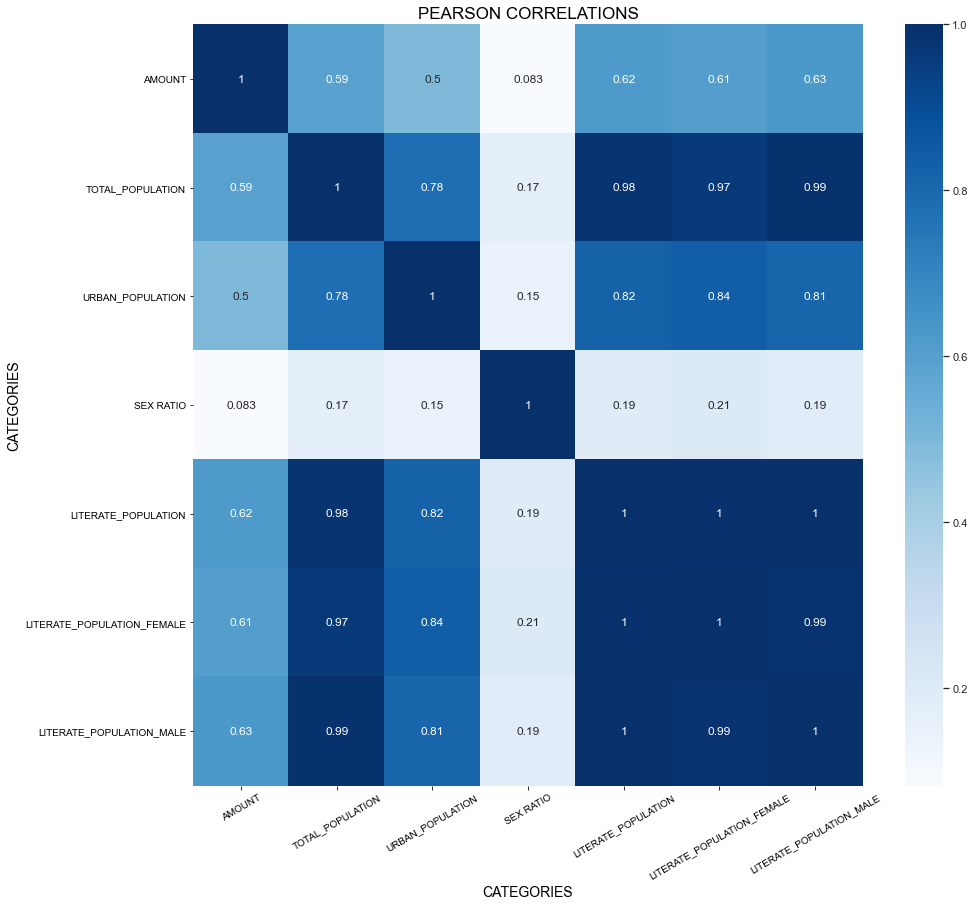

In [38]:
#Heatmap on the pearson correlations of the merged dataset
fig,ax=plt.subplots(figsize=(15,14))
sns.set_theme(style='white')
sns.heatmap(data=df_plot_Corr,annot=True,cmap='Blues')
plt.xticks(rotation=30)
plt.xlabel('CATEGORIES',fontsize=14)
plt.ylabel('CATEGORIES',fontsize=14)
plt.title('PEARSON CORRELATIONS',fontsize=17);
#The most positive correlations noted between sales amount and population is the number
# of literate population and the number of population in urban settings

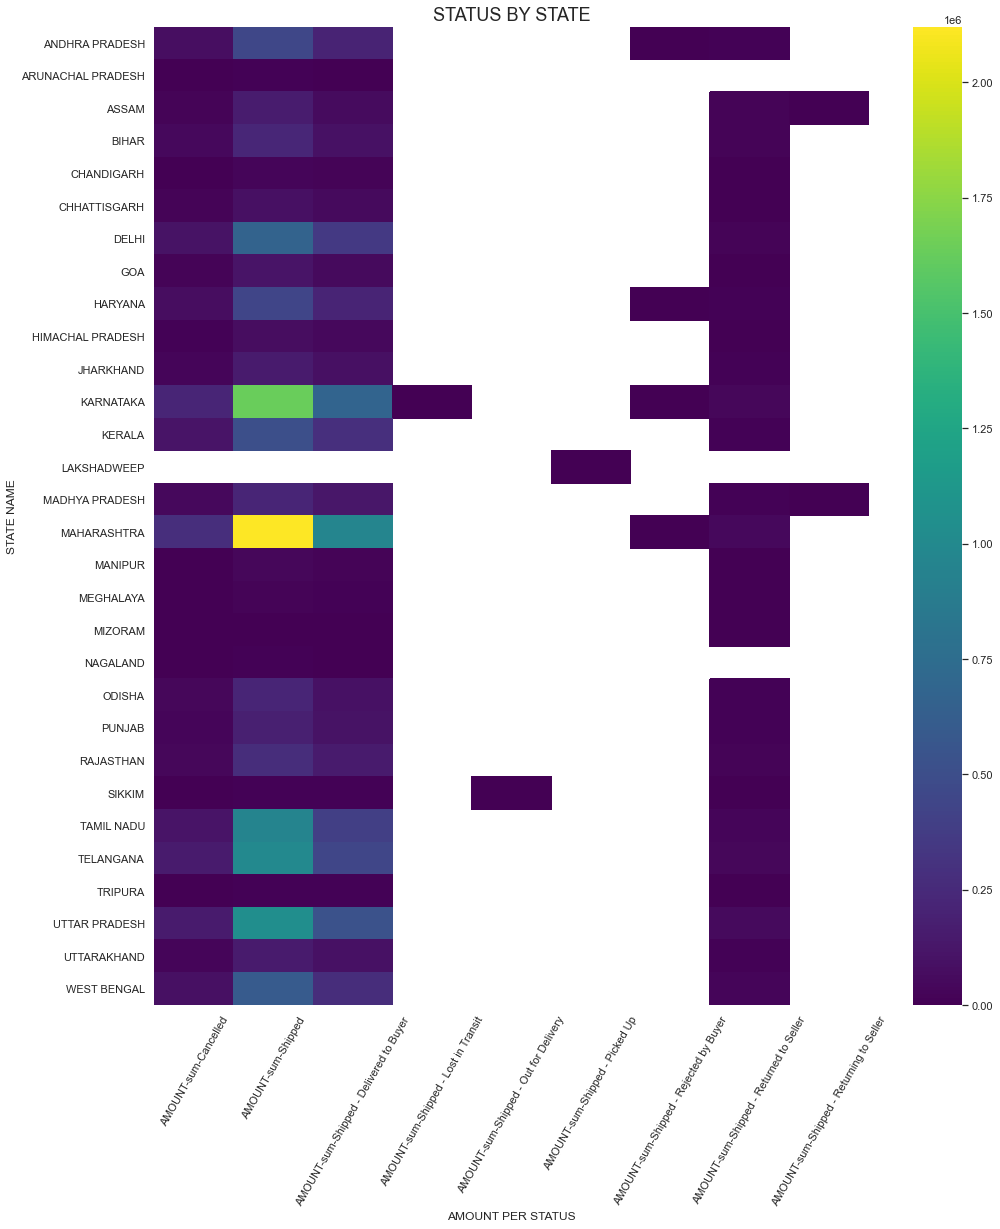

In [39]:
#Heatmap showing status of shipments by state
fig,ax=plt.subplots(figsize=(16,18))
sns.set_theme(style='white')
sns.heatmap(data=df_pivot_Amount,cmap='viridis')
plt.xticks(rotation=60)
plt.xlabel('AMOUNT PER STATUS',fontsize=12)
plt.ylabel('STATE NAME',fontsize=12)
plt.title('STATUS BY STATE',fontsize=18);
#Maharashtra has the highest number of shipped items followed by Karantaka
#Karantaka has lost shipments in comparison to other states

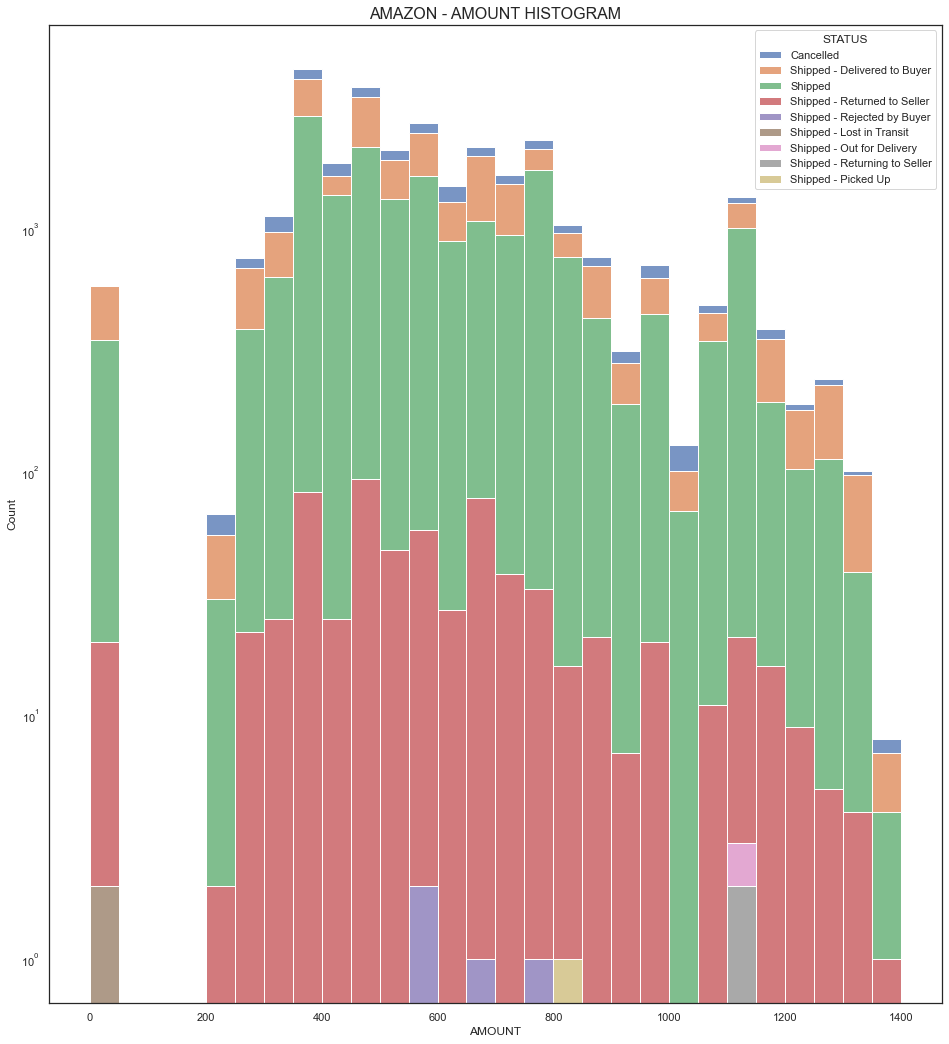

In [40]:
#Checking the distribution of data in columns using histograms
fig,ax=plt.subplots(figsize=(16,18))
sns.histplot(data=df_Main, x="AMOUNT",binwidth=50,hue='STATUS',multiple='stack')
plt.title('AMAZON - AMOUNT HISTOGRAM',fontsize=16)
plt.yscale('log');
#A majority of the goods were in shipped and pending waiting pick up categories 

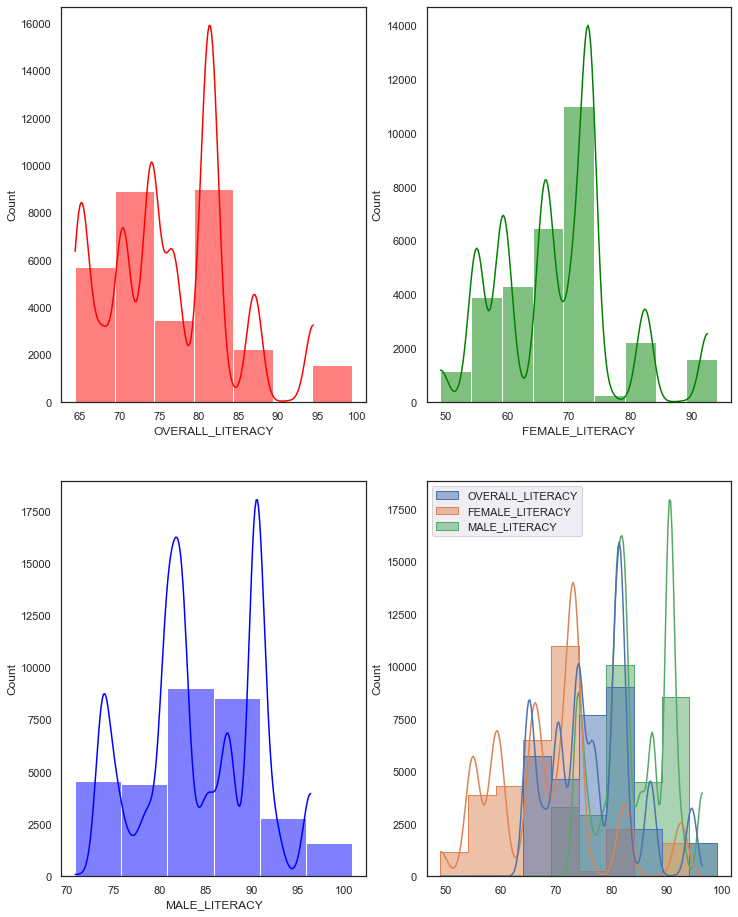

In [41]:
#Histogram showing the distribution of literate population
fig,axes= plt.subplots(2,2,figsize=(12,16))
sns.set_theme(style='darkgrid')
sns.histplot(data=df_Main, x="OVERALL_LITERACY",kde=True,element='bars',
             color='red',ax=axes[0,0],binwidth=5)
sns.histplot(data=df_Main, x="FEMALE_LITERACY",kde=True,element='bars',
             color='green',ax=axes[0,1],binwidth=5)
sns.histplot(data=df_Main, x="MALE_LITERACY",kde=True,element='bars',
             color='blue',ax=axes[1,0],binwidth=5)
sns.histplot(data=df_Main[["OVERALL_LITERACY","FEMALE_LITERACY","MALE_LITERACY"]],
             kde=True,alpha = 0.5,ax=axes[1,1],binwidth=5,element='step')
plt.show();
#The gap in literacy between gender still exist

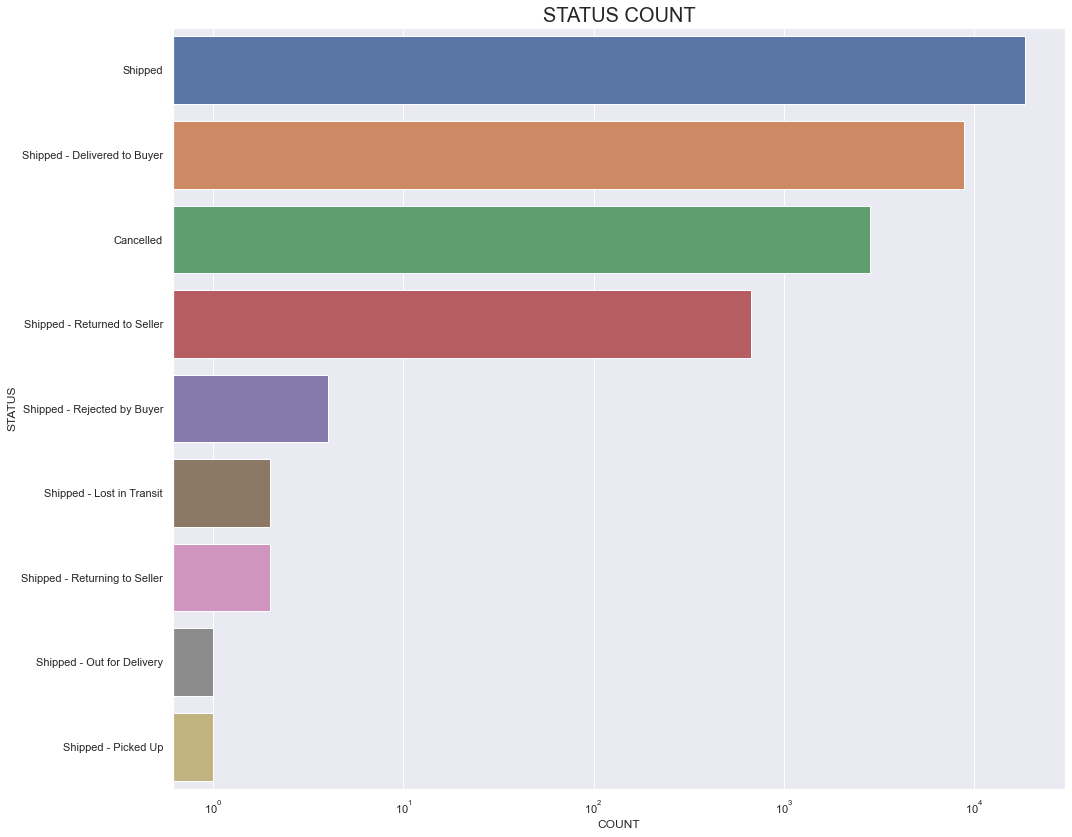

In [42]:
#The start of various visualization to establish relationships
fig,ax=plt.subplots(figsize=(16,14))
sns.set_theme(style='darkgrid')
sns.countplot(data=df_Main,
            y='STATUS',            
            order=df_Main['STATUS'].value_counts().index)
plt.xscale('log')
plt.title('STATUS COUNT',fontsize=20)
plt.xlabel('COUNT',fontsize=12)
plt.ylabel('STATUS',fontsize=12);
#The number of cancelled orders is significantly high why is this?

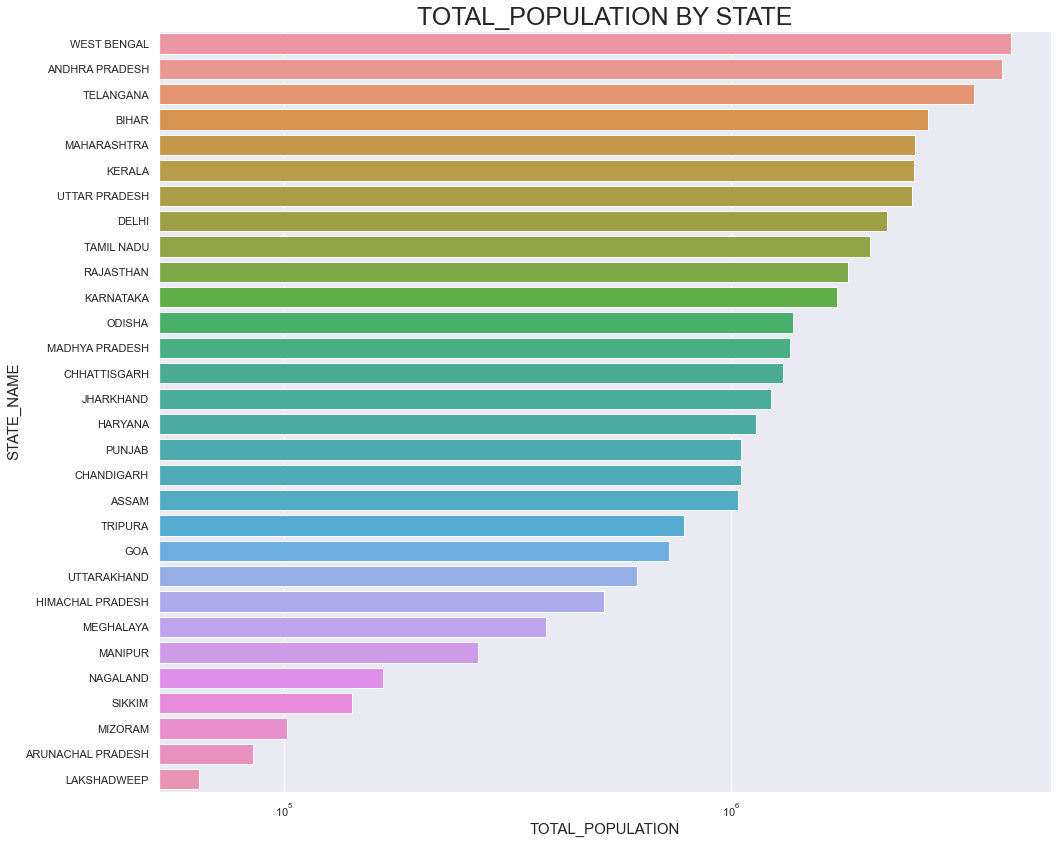

In [43]:
#Total population by state
fig,ax=plt.subplots(figsize=(16,14))
sns.barplot(data=df_plot,
            y=df_plot.index,            
            x='TOTAL_POPULATION',
            orient= 'h',
            order=df_plot.sort_values('TOTAL_POPULATION',ascending=False).index)
plt.xscale('log')
#plt.yscale('log')
plt.title('TOTAL_POPULATION BY STATE',fontsize=25)
plt.xlabel('TOTAL_POPULATION',fontsize=15)
plt.ylabel('STATE_NAME',fontsize=15);
#States with higher population make good target markets 

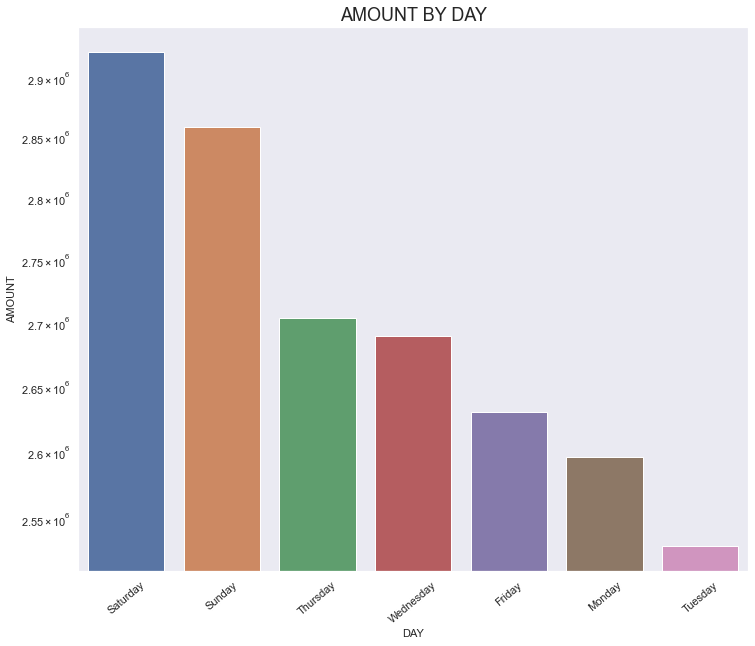

In [44]:
#Bar plot showing the no of sales by Day
fig,ax=plt.subplots(figsize=(12,10))
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot_day,
            y='AMOUNT',
            x=df_plot_day.index,
            order=df_plot_day.sort_values('AMOUNT',ascending=False).index)
plt.xticks(rotation=40)
plt.title('AMOUNT BY DAY',fontsize=18)
plt.yscale('log')
plt.ylabel('AMOUNT',fontsize=11)
plt.xlabel('DAY',fontsize=11);
#Sunday has the highest number of sales, since it is a weekend people have time to shop online
#It may also be a good time to target customers through advertisements

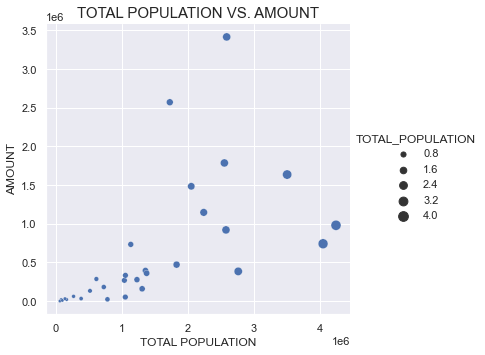

In [45]:
#Plot showing the distribution of amounts by population
sns.set(rc={'figure.figsize':(12,14)})
sns.color_palette("rocket", as_cmap='jet')
sns.relplot(data=df_plot,
            x='TOTAL_POPULATION',
            y='AMOUNT',
            palette='rocket',
            size='TOTAL_POPULATION',
            sizes=(10,100))
plt.title('TOTAL POPULATION VS. AMOUNT',fontsize=15)
plt.ylabel('AMOUNT',fontsize=12)
plt.xlabel('TOTAL POPULATION',fontsize=12);
#There is a correlation between population and amount, higher population results in higher amount of sales

In [46]:
#Interactive scatterplot showing the relationship between amount and population based on urban population
px.scatter(df_plot, x='TOTAL_POPULATION', y='AMOUNT',color='URBAN_POPULATION',title='TOTAL POPULATION VS. AMOUNT',
           size='LITERATE_POPULATION',hover_name=df_plot.index)
#There is a correlation between population and amount, higher urban population results in higher amount of sales

In [47]:
#Interactive scatterplot showing the relationship between amount and population based on literate population
px.scatter(df_plot, x='TOTAL_POPULATION', y='AMOUNT',color='LITERATE_POPULATION',title='TOTAL POPULATION VS. AMOUNT',
           size='URBAN_POPULATION',hover_name=df_plot.index)
#There is a correlation between population and amount, higher literate populations results in higher amount of sales

In [97]:
import folium

m = folium.Map(location=[22.9734, 78.6569])
m